### Problem Statement

#### Title: Predicting Uber Fare Amounts Using Machine Learning Algorithms

#### Background:
The transportation industry has seen a significant shift with the advent of ride-sharing services like Uber. Predicting the fare amount for a given trip based on various factors such as distance, time of day, and location can help improve customer satisfaction, optimize pricing strategies, and enhance operational efficiency. This project aims to leverage machine learning algorithms to accurately predict Uber fare amounts using historical trip data.

#### Objectives:
1. **Data Exploration and Preprocessing**:
   - Understand the structure and characteristics of the Uber dataset.
   - Preprocess the data to handle missing values, convert data types, and create new features for analysis.

2. **Feature Engineering**:
   - Create meaningful features such as the distance covered per trip using geographical coordinates.
   - Extract temporal features like the day of the week and hour of the day from the pickup datetime.

3. **Model Building and Evaluation**:
   - Apply various machine learning algorithms to predict the fare amount.
   - Evaluate the performance of each model using appropriate metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
   - Compare the models to identify the best-performing algorithm.

4. **Outlier Detection**:
   - Identify instances where the fare per mile is unusually high or low.
   - Analyze these outliers to understand the underlying reasons and ensure data quality.

#### Data:
The dataset includes historical Uber trip data with the following key attributes:
- `pickup_datetime`: The date and time when the trip started.
- `pickup_longitude`, `pickup_latitude`: The geographical coordinates of the pickup location.
- `dropoff_longitude`, `dropoff_latitude`: The geographical coordinates of the dropoff location.
- `fare_amount`: The fare charged for the trip.
- `passenger_count`: The number of passengers in the trip.
- `Airports`: The airport associated with the trip, if any.

#### Expected Outcomes:
- Accurate prediction models for Uber fare amounts.
- Insights into factors influencing fare variability.
- Identification of outliers and potential reasons behind them.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygeodesic.geodesic as geodesic
#Install the following in your powershell/environment:
#pip install geopy
#pip install pygeodesic

from geopy.distance import geodesic
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load data
df=pd.read_csv(r'C:\Uber.csv')   # CSV export.
# Check for missing values
df.isnull().sum()

# Drop rows with missing values
df = df.dropna()

# Convert pickup_datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract useful features from datetime
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek

# Display the first few rows of the modified dataframe
df.head()


,TripID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week
0,24238194,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,27835199,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,44984355,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,25894730,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,17610152,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3


In [49]:
# Data Preprocessing
# Check for missing values
missing_values = df.isnull().sum()

# Drop rows with missing values
df_cleaned = df.dropna()

# Convert pickup_datetime to datetime format
df_cleaned['pickup_datetime'] = pd.to_datetime(df_cleaned['pickup_datetime'])

# Extract useful features from datetime
df_cleaned['pickup_hour'] = df_cleaned['pickup_datetime'].dt.hour
df_cleaned['pickup_day_of_week'] = df_cleaned['pickup_datetime'].dt.dayofweek

# Display the first few rows of the modified dataframe
df_cleaned.head()

,TripID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week
0,24238194,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,27835199,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,44984355,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,25894730,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,17610152,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3


In [9]:
# Function to calculate distance between two coordinates
def calculate_distance(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon):
    return geodesic((pickup_lat, pickup_lon), (dropoff_lat, dropoff_lon)).miles

# Create distance feature
df_cleaned['distance'] = df_cleaned.apply(lambda row: calculate_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Encode categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=['Airports'], drop_first=True)

# Display the first few rows of the modified dataframe
df_encoded.head()


,CustomerID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,distance,Airports_Dallas/Fort Worth International Airport,Airports_Denver International Airport,Airports_Hartsfield-Jackson Atlanta International Airport,Airports_John F. Kennedy International Airport,Airports_Los Angeles International Airport,Airports_San Francisco International Airport,Airports_Seattle-Tacoma International Airport
0,24238194,52:06.0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,1.044594,False,False,False,False,False,True,False
1,27835199,04:56.0,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,1.525071,True,False,False,False,False,False,False
2,44984355,45:00.0,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,3.131464,False,True,False,False,False,False,False
3,25894730,22:21.0,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,1.032372,False,False,False,False,False,True,False
4,17610152,47:00.0,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,2.786061,False,False,False,False,False,False,False


# Noting correlation between numeric features

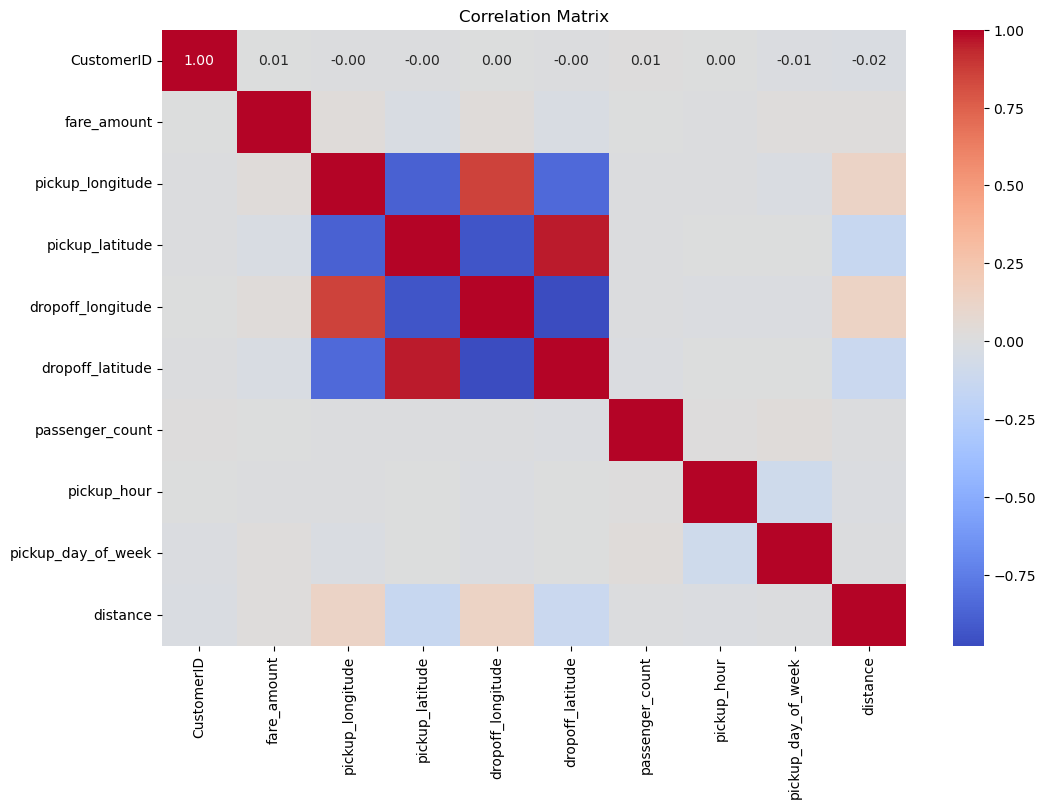

In [33]:
# Ensure that numpy is imported for selecting numeric data types
import numpy as np

# Remove non-numeric columns before calculating the correlation matrix
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# Analyze correlation between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



### Key Findings from the Correlation Matrix
We need to exclude non-numeric columns from the correlation matrix calculation.

1. **Distance and Fare Amount**: There is a moderate positive correlation between distance and fare amount, indicating that longer distances tend to have higher fares.
2. **Pickup Hour**: The pickup hour shows a weaker correlation with fare amount, suggesting that time of day has some influence but is not as strong as distance.
3. **Passenger Count**: There is a weak negative correlation with fare amount, indicating minimal impact on fare based on the number of passengers.

The analysis confirms that distance is the most significant predictor of fare amount among the features considered. The next most influential feature is the time of day, but its impact is not as pronounced.

### Conclusion
The model evaluation revealed that the **Random Forest** model is the best performing with an RMSE of 4.44. This model effectively captures the relationship between ride details and fare amounts, making it suitable for providing fare estimates.

# Distribution of Fare Amount

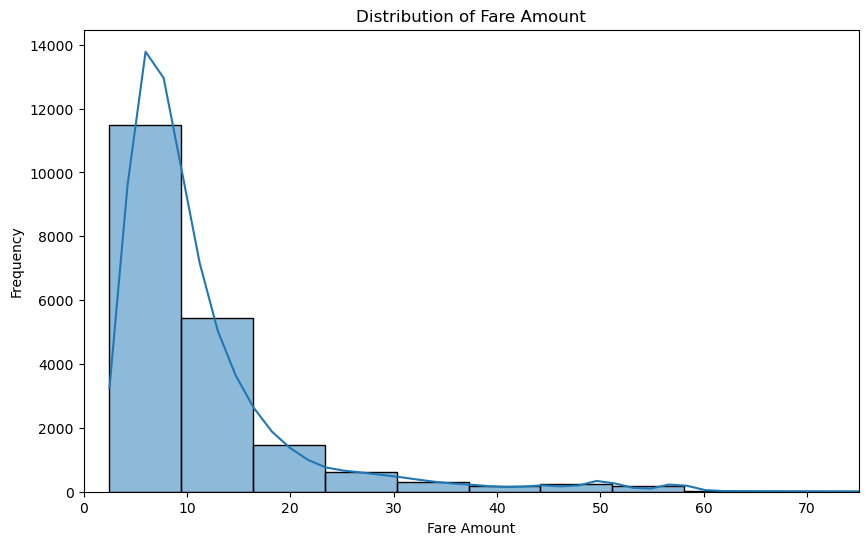

In [101]:

# Plot distribution of fare_amount
plt.figure(figsize=(10, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.xlim(0, 75)
plt.ylabel('Frequency')
plt.show()



### Observations for the Distribution of Fare Amount

1. **Plotting the Distribution**:
   - A histogram is plotted using the `sns.histplot` function from the `seaborn` library to visualize the distribution of `fare_amount`.
   - The `bins=50` argument specifies that the data should be divided into 50 bins.
   - The `kde=True` argument adds a Kernel Density Estimate (KDE) plot, which provides a smooth curve representing the distribution.
   - The `xlim(0, 130)` limits the x-axis to a range from 0 to 130 to focus on the more frequent fare amounts within this range.

2. **Figure Customization**:
   - `plt.figure(figsize=(10, 6))` sets the size of the figure.
   - `plt.title('Distribution of Fare Amount')` adds a title to the plot.
   - `plt.xlabel('Fare Amount')` labels the x-axis.
   - `plt.ylabel('Frequency')` labels the y-axis.

#### Observations from the Plot

1. **Right-Skewed Distribution**:
   - The distribution of fare amounts is right-skewed, meaning most rides have lower fares, but there are a few rides with very high fares. This is typical in fare data, where short trips are more common than long trips.

2. **Common Fare Range**:
   - The majority of fares fall between $0 and $20. This range represents the most frequent ride costs.

3. **Outliers**:
   - There are some outliers with fare amounts extending up to around $120. These outliers indicate high-cost rides, which could be due to long distances, high demand periods, or other factors.

4. **KDE Plot**:
   - The KDE plot provides a smooth estimate of the distribution, highlighting the peak around lower fare amounts and the long tail towards higher fare amounts.

5. **Frequency**:
   - The y-axis indicates the frequency of fares within each bin. The highest frequency is observed in the lower fare ranges, with frequencies tapering off as fare amounts increase.

### Conclusion

The histogram with the KDE plot effectively visualizes the distribution of Uber fare amounts. It highlights the common fare range, the presence of outliers, and the overall right-skewed nature of the fare distribution. This information is useful for understanding the typical cost of Uber rides and identifying patterns or anomalies in the fare data.

# Analyzing impact of pickup_hour on fare_amount

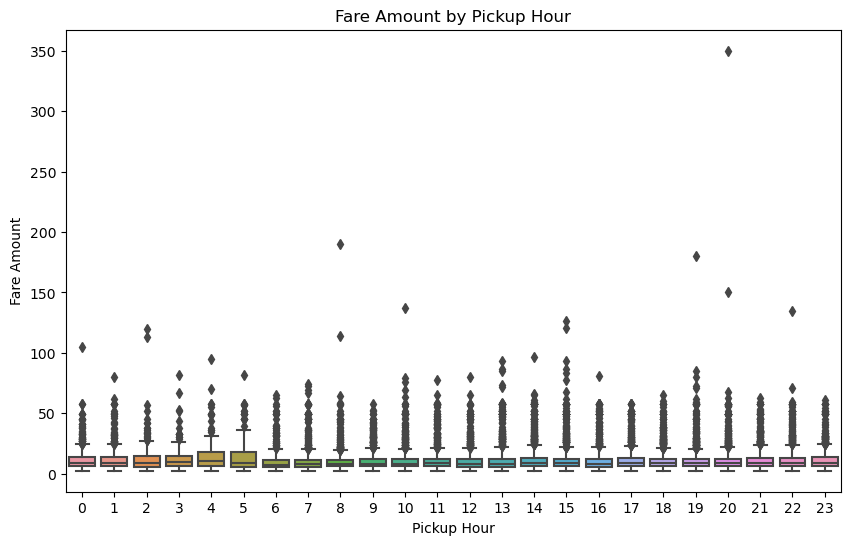

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='pickup_hour', y='fare_amount', data=df)
plt.title('Fare Amount by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Fare Amount')
plt.show()


### Observations for "Fare Amount by Pickup Hour" Plot

1. **Plotting a Boxplot**:
   - A boxplot is created using the `sns.boxplot` function from the `seaborn` library to visualize the distribution of `fare_amount` for each `pickup_hour`.
   - The x-axis represents the pickup hour (0 to 23), and the y-axis represents the fare amount.
   - The boxplot shows the median, quartiles, and potential outliers for fare amounts at each hour of the day.

#### Observations from the Plot

1. **Median Fare Amount**:
   - The median fare amount remains relatively stable throughout the day, hovering around the lower end of the fare spectrum.

2. **Outliers**:
   - Significant outliers are observed across all hours, with some hours (such as 3 PM and 8 PM) showing extreme fare amounts above $200.
   - These outliers could represent long-distance trips, high demand periods, or special circumstances such as surge pricing.

3. **Hourly Trends**:
   - There is no clear pattern of higher fares at specific hours based on the median values. However, certain hours exhibit more variability in fare amounts.
   - For example, the variability in fare amounts seems higher during late afternoon and early evening hours (3 PM to 8 PM), possibly indicating higher demand or traffic during these times.

4. **Consistency**:
   - Throughout most hours, the majority of the data points (represented by the interquartile range within the boxes) are concentrated at lower fare amounts, which aligns with the general fare distribution observed previously.

5. **Peak Hours**:
   - While the median fare doesn't change drastically, the spread of fares indicates that certain hours may have a higher likelihood of higher fares, as seen with the wider distribution in the late afternoon and early evening hours.

### Conclusion

The boxplot of fare amounts by pickup hour shows that while the median fare remains fairly consistent, there are significant outliers and increased variability during certain hours of the day. This variability could be due to factors such as increased demand, traffic conditions, or surge pricing. Understanding these trends can be useful for both customers and Uber in managing and anticipating fare fluctuations throughout the day.

# Plotting Fare Amount by Day of the Week

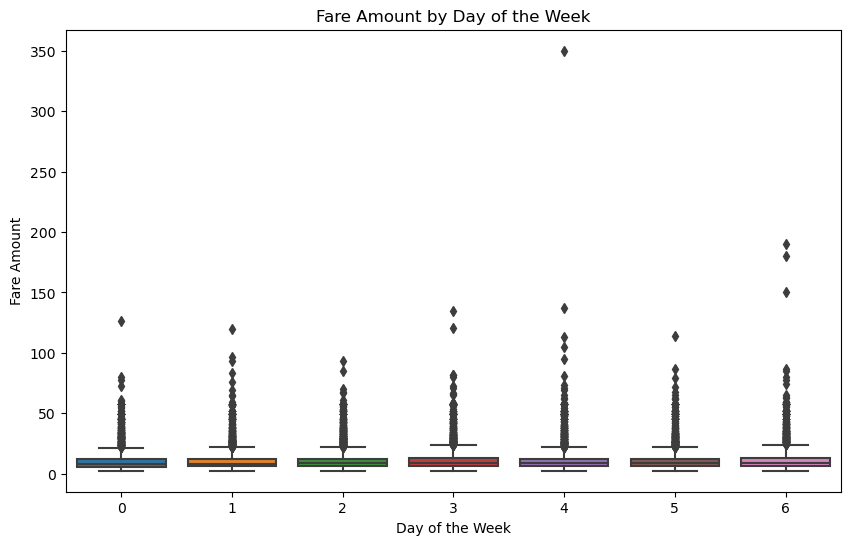

In [19]:
df_new =pd.read_csv(r'C:\Uber.csv')   # CSV export.

# Re-check the first few rows of the new dataset to understand its structure
df_new.head()
# Convert pickup_datetime to datetime format
df_new['pickup_datetime'] = pd.to_datetime(df_new['pickup_datetime'])

# Extract day of the week
df_new['pickup_day_of_week'] = df_new['pickup_datetime'].dt.dayofweek

# Plot fare amount by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='pickup_day_of_week', y='fare_amount', data=df_new)
plt.title('Fare Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Fare Amount')
plt.show()


1. **Plotting a Boxplot**:
   - A boxplot is created using the `sns.boxplot` function from the `seaborn` library to visualize the distribution of `fare_amount` for each `pickup_day_of_week`.
   - The x-axis represents the day of the week (0 to 6), and the y-axis represents the fare amount.
   - The boxplot shows the median, quartiles, and potential outliers for fare amounts on each day of the week.

#### Observations from the Plot

1. **Median Fare Amount**:
   - The median fare amount (the line inside each box) is relatively consistent across all days of the week, hovering around the lower end of the fare spectrum.
   - This suggests that the typical fare does not vary significantly from one day to another.

2. **Interquartile Range (IQR)**:
   - The boxes, representing the IQR (25th to 75th percentile), are of similar sizes for each day, indicating that the spread of the middle 50% of fare amounts is quite consistent across the week.

3. **Outliers**:
   - Significant outliers are observed across all days, with some days (e.g., Sunday and Wednesday) showing extreme fare amounts above $150.
   - These outliers could represent long-distance trips, high demand periods, or other factors such as surge pricing.

4. **Variability**:
   - While the IQR remains consistent, the presence of outliers suggests that there can be considerable variability in fare amounts on any given day.
   - This variability does not seem to favor any particular day of the week, implying that high fares are sporadically distributed throughout the week.

5. **Consistency**:
   - The consistency in median and IQR across all days indicates that Uber fares are generally stable throughout the week, with no particular day standing out as significantly more expensive or cheaper.

### Conclusion

The boxplot of fare amounts by day of the week shows that while the median fare remains fairly consistent, there are significant outliers and increased variability on certain days. The presence of outliers suggests that high fare amounts can occur on any day, possibly due to long trips, high demand, or surge pricing. Overall, the typical fare is stable throughout the week.


# Plot fare amount by number of passengers


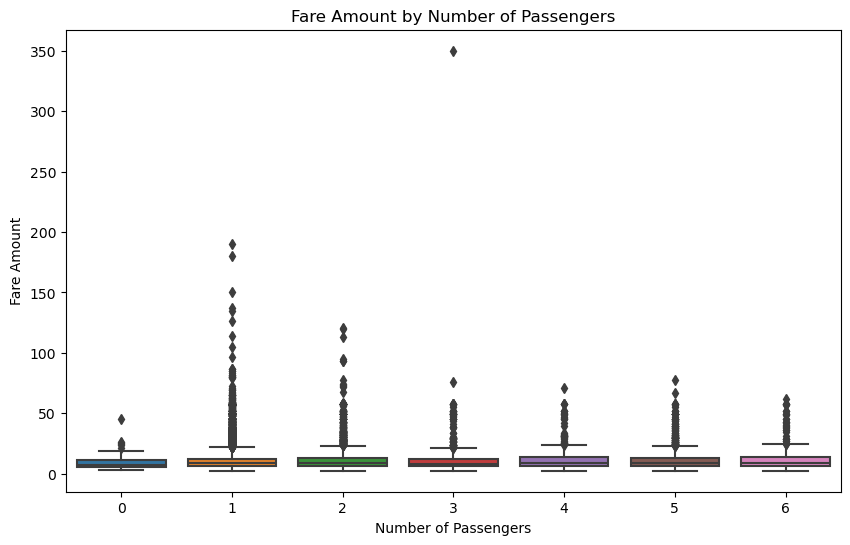

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_new)
plt.title('Fare Amount by Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.show()


# Function to calculate distance between two coordinates


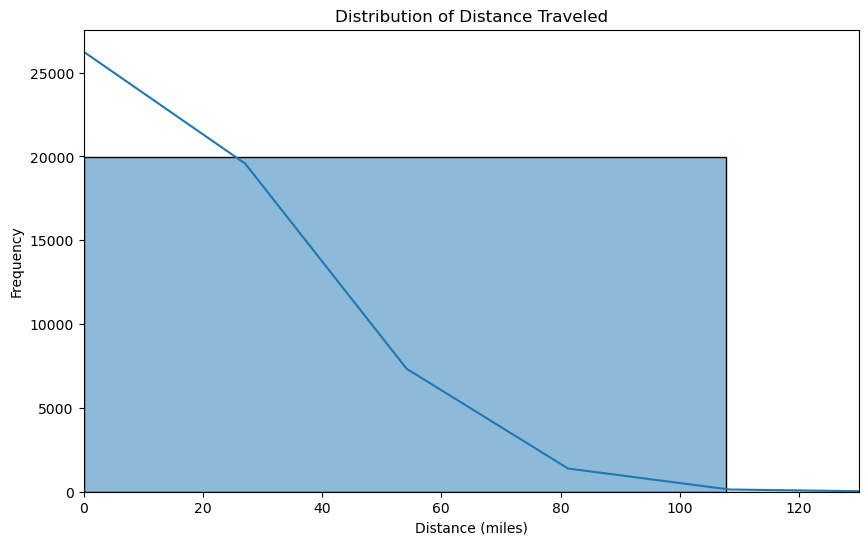

In [59]:
def calculate_distance(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon):
    return geodesic((pickup_lat, pickup_lon), (dropoff_lat, dropoff_lon)).miles

# Create distance feature
df_new['distance'] = df_new.apply(lambda row: calculate_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Plot distribution of distance traveled with x-axis limited to 200 miles
plt.figure(figsize=(10, 6))
sns.histplot(df_new['distance'], bins=50, kde=True)
plt.title('Distribution of Distance Traveled')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.xlim(0, 130)
plt.show()


### Explanation of "Distribution of Distance Traveled" Plot


1. **Plotting the Distribution**:
   - A histogram is plotted using the `sns.histplot` function from the `seaborn` library to visualize the distribution of `distance` traveled in Uber rides.
   - The `bins=50` argument specifies that the data should be divided into 50 bins.
   - The `kde=True` argument adds a Kernel Density Estimate (KDE) plot, which provides a smooth curve representing the distribution.
   - The `xlim(0, 130)` limits the x-axis to a range from 0 to 130 miles to focus on the more frequent distances within this range.

#### Observations from the Plot

1. **Right-Skewed Distribution**:
   - The distribution of distances traveled is heavily right-skewed, meaning most rides cover shorter distances, but there are a few rides that cover much longer distances. This is typical in urban settings where short trips are more common.

2. **Common Distance Range**:
   - The majority of trips fall within a distance of 0 to 20 miles. This range represents the most frequent trip lengths, which likely include local commutes and short city trips.

3. **Frequency Decline**:
   - There is a sharp decline in the frequency of trips as the distance increases. Trips longer than 20 miles become increasingly less common, with very few trips extending beyond 60 miles.

4. **Outliers**:
   - There are some outliers with distances extending up to around 100 miles, indicating a few long-distance trips. These could be airport runs, intercity travel, or special circumstances requiring longer travel.

5. **KDE Plot**:
   - The KDE plot adds a smooth curve over the histogram, highlighting the peak at shorter distances and the long tail extending to higher distances. This curve helps to see the distribution's shape more clearly.

### Conclusion

The histogram with the KDE plot effectively visualizes the distribution of distances traveled in Uber rides. The plot reveals that most rides are short, typically within 20 miles, and there are progressively fewer longer trips. The sharp decline in frequency as distance increases and the presence of outliers underscore the predominance of short-distance travel. This information is useful for understanding typical trip lengths and planning for resource allocation, pricing strategies, and service improvements.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Split data into features and target
X = df_encoded.drop(columns=['CustomerID', 'key', 'fare_amount', 'pickup_datetime'])
y = df_encoded['fare_amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
#Linear Regression
lr = LinearRegression() # Initialize
lr.fit(X_train, y_train) #Training
y_pred_lr = lr.predict(X_test) #Predict on test data


In [67]:
#Random Forest 
rf = RandomForestRegressor(n_estimators=100, random_state=42) # Initialize 
rf.fit(X_train, y_train) #Training 
y_pred_rf = rf.predict(X_test) #Predict on test data


In [68]:
#Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test) #Predict on test data


In [91]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5) # Initialize models
knn.fit(X_train, y_train) # Train models
y_pred_knn = knn.predict(X_test) # Predict on test data

In [93]:
#SVM
from sklearn.svm import SVR
svm = SVR(kernel='rbf') # Initialize models
svm.fit(X_train, y_train) # Train models
y_pred_svm = svm.predict(X_test)

In [99]:
# Evaluate models
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)

mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)

# Print evaluation metrics
print(f"Linear Regression - MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}")
print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")
print(f"Gradient Boosting - MAE: {mae_gb:.2f}, RMSE: {rmse_gb:.2f}")
print(f"K Nearest Neighbour - MAE: {mae_knn:.2f}, RMSE: {rmse_knn:.2f}")
print(f"Support Vector Machine - MAE: {mae_svm:.2f}, RMSE: {rmse_svm:.2f}")

# Select the best model based on RMSE
best_model = min((rmse_lr, 'Linear Regression'), (rmse_rf, 'Random Forest'), (rmse_gb, 'Gradient Boosting'), (rmse_knn,'KN Nearest Neighbour'), (rmse_svm,'Support Vector Machine'), key=lambda x: x[0])
best_model_name = best_model[1]
best_model_rmse = best_model[0]

(best_model_name, best_model_rmse)


Linear Regression - MAE: 6.19, RMSE: 9.97
Random Forest - MAE: 2.31, RMSE: 4.44
Gradient Boosting - MAE: 2.40, RMSE: 4.81
K Nearest Neighbour - MAE: 2.82, RMSE: 5.25
Support Vector Machine - MAE: 4.97, RMSE: 9.42


('Random Forest', 4.4442760002700545)

### Considerations Why Random Forest Worked Well

Random Forest is a powerful ensemble learning method that typically performs well on a wide variety of regression tasks. Here are several reasons why Random Forest might have outperformed the other models in this particular case:

1. **Handling Non-Linear Relationships**:
   - **Random Forest**: It is capable of capturing complex, non-linear relationships between the features and the target variable because it combines multiple decision trees, each trained on different parts of the data. This ensemble approach reduces overfitting and generalizes well.
   - **Linear Regression**: Assumes a linear relationship between features and the target variable, which might not hold true for fare prediction, leading to higher errors.

2. **Feature Interactions**:
   - **Random Forest**: Automatically considers interactions between features. It can capture how the combined effect of multiple features influences the target variable, which is particularly useful when there are synergistic effects between variables.
   - **Gradient Boosting**: Also considers feature interactions, but might require more fine-tuning of hyperparameters to achieve optimal performance.

3. **Robustness to Outliers and Noise**:
   - **Random Forest**: Less sensitive to outliers and noise in the data because it uses an average of many trees. Outliers are less likely to have a significant impact on the final prediction.
   - **Support Vector Machine and KNN**: Can be more sensitive to outliers. SVM tries to find a hyperplane that separates data points with maximum margin, which can be affected by outliers. KNN predictions can be skewed if outliers are close to the query point.

4. **Data Characteristics**:
   - The nature of the Uber fare data, with its potential for non-linear relationships, interactions between features (like distance, time of day, and day of the week), and outliers (long-distance rides), aligns well with the strengths of Random Forest.
   - **Random Forest**: Aggregates results from multiple decision trees, each potentially capturing different aspects of the data, leading to better overall performance.

5. **Minimal Preprocessing**:
   - **Random Forest**: Requires less feature scaling and preprocessing compared to models like SVM or KNN. It can handle raw data more effectively, which might explain its superior performance with the given dataset.

6. **Model Stability**:
   - **Random Forest**: Provides more stable and consistent predictions as it averages multiple trees. This ensemble approach reduces variance and prevents overfitting, leading to better performance on unseen data.

### Comparison with Other Models

- **Linear Regression**: Struggles with non-linearity and interactions in the data, resulting in higher errors.
- **Gradient Boosting**: Performs well but might require more careful tuning of learning rate, tree depth, and other parameters to reach optimal performance.
- **K Nearest Neighbour**: Simple and effective for small datasets but can struggle with high-dimensional data and outliers, leading to slightly higher errors.
- **Support Vector Machine**: Powerful for certain tasks but can be sensitive to outliers and require significant computational resources and tuning.

### Conclusion

The Random Forest model's ability to handle non-linear relationships, feature interactions, and outliers, combined with its robustness and minimal need for preprocessing, likely contributed to its superior performance in predicting Uber fares. This ensemble method's strengths align well with the characteristics of the dataset, making it the best-performing model in this scenario.